# Anaconda prompt 에서

###      pip install mlxtend  

###     conda install -c conda-forge scikit-plot

In [1]:
# imports and setup
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option('precision', 4) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.5f}'.format) # get rid of scientific notation

plt.style.use('seaborn') # pretty matplotlib plots

# 9.6.1 Support Vector Classifier

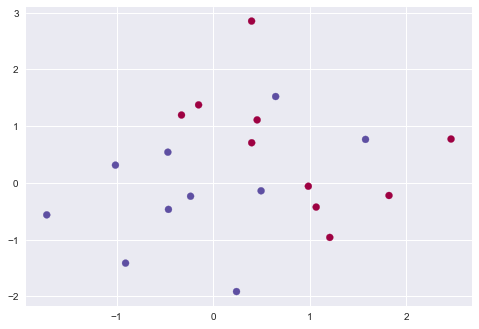

In [2]:
np.random.seed(42)

X = np.random.normal(size=40).reshape(20,2)
y = np.concatenate((np.ones(10, dtype=np.int64)*-1, np.ones(10, dtype=np.int64)))
X[y == 1, :] += 1

plt.scatter(X[:, 0], X[:, 1], c=(3-y), cmap='Spectral'); # why color 3-y?

In [3]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=10)
svc.fit(X, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

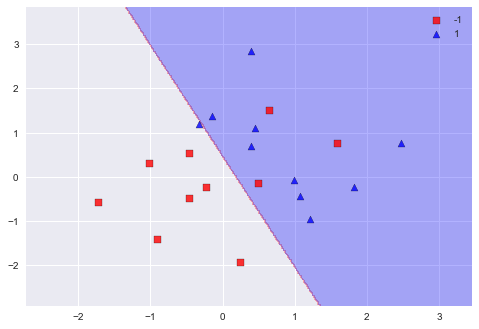

In [4]:
# using the excellent mlxtend package
from mlxtend.plotting import plot_decision_regions

#plot_decision_regions(X, y, clf=svc, X_highlight=svc.support_vectors_);
plot_decision_regions(X, y, clf=svc);

In [5]:
# support vectors
pd.DataFrame(svc.support_vectors_, index=svc.support_)

,0,1
0,0.49671,-0.13826
1,0.64769,1.52303
2,-0.23415,-0.23414
3,1.57921,0.76743
4,-0.46947,0.54256
6,0.24196,-1.91328
11,1.06753,-0.42475
12,0.45562,1.11092
13,-0.15099,1.37570
14,0.39936,0.70831


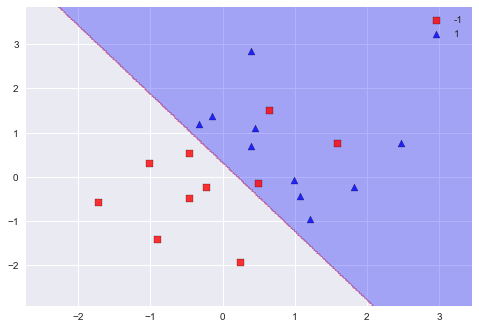

In [6]:
svc2 = SVC(kernel='linear', C=0.1)
svc2.fit(X, y)

#plot_decision_regions(X, y, clf=svc2, X_highlight=svc2.support_vectors_);
plot_decision_regions(X, y, clf=svc2);

In [7]:
# support vectors
pd.DataFrame(svc2.support_vectors_, index=svc2.support_)

,0,1
0,0.49671,-0.13826
1,0.64769,1.52303
2,-0.23415,-0.23414
3,1.57921,0.76743
4,-0.46947,0.54256
5,-0.46342,-0.46573
...,...,...
14,0.39936,0.70831
15,0.39829,2.85228
16,0.98650,-0.05771


In [8]:
from sklearn.model_selection import GridSearchCV

svc3 = SVC(kernel='linear')
c_space = np.array([0.001, 0.01, 0.1, 1, 5, 10, 100])
param_grid = {'C': c_space}

tune = GridSearchCV(svc3, param_grid, cv=10)
tune.fit(X, y)

tune.cv_results_
tune.best_params_

{'C': 0.001}

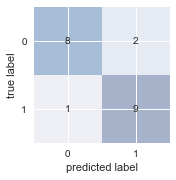

In [9]:
from sklearn.utils import resample

np.random.seed(42)
X_test = np.random.normal(size=40).reshape(20,2)
y_test = resample(np.concatenate((np.ones(10, dtype=np.int64)*-1, np.ones(10, dtype=np.int64))),
                  replace=True,
                  n_samples=20, random_state=42)
X_test[y_test == 1, :] += 1

y_pred = tune.predict(X_test)

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test, y_pred));

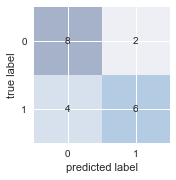

In [10]:
svc4 = SVC(kernel='linear', C=0.01)
svc4.fit(X_test, y_test)

y_pred4 = svc4.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred4));

In [11]:
X[y == 1, :] += 1.1

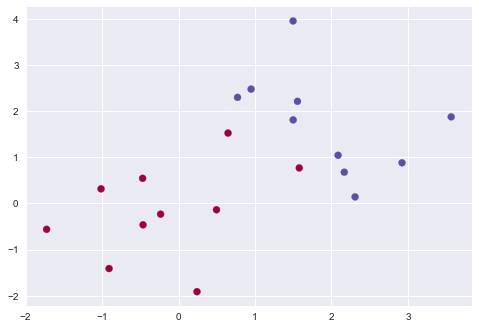

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=(y+5)/2, cmap='Spectral');

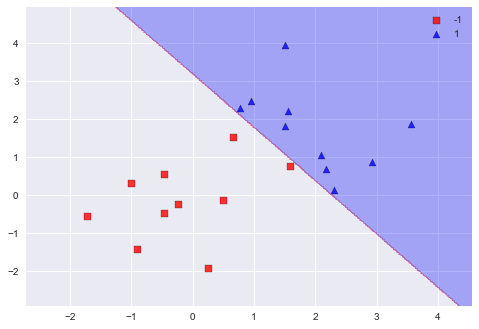

In [13]:
svc5 = SVC(kernel='linear', C=1e5)
svc5.fit(X, y)
#plot_decision_regions(X, y, clf=svc5, X_highlight=svc5.support_vectors_);
plot_decision_regions(X, y, clf=svc5);

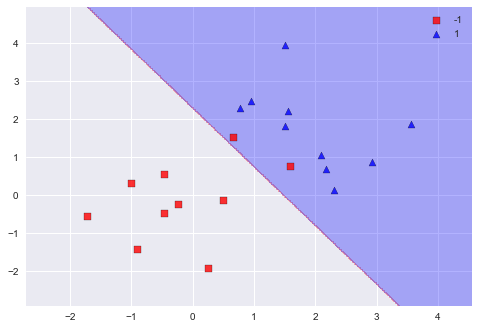

In [14]:
svc6 = SVC(kernel='linear', C=1)
svc6.fit(X, y)

#plot_decision_regions(X, y, clf=svc6, X_highlight=svc6.support_vectors_);
plot_decision_regions(X, y, clf=svc6);

# 9.6.2 Support Vector Machine

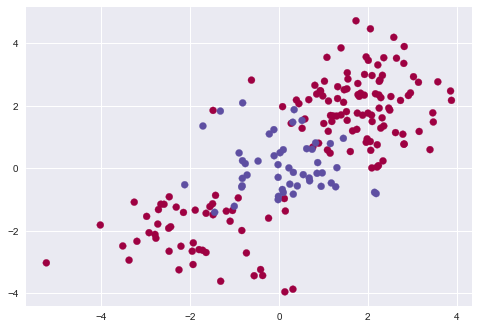

In [15]:
np.random.seed(42)

X = np.random.normal(size=400).reshape(200, 2)
X[0:100, :] += 2
X[100:150, :] -= 2
y = np.concatenate((np.full(150, 1, dtype=np.int64), np.full(50, 2, dtype=np.int64)))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral');

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=42)

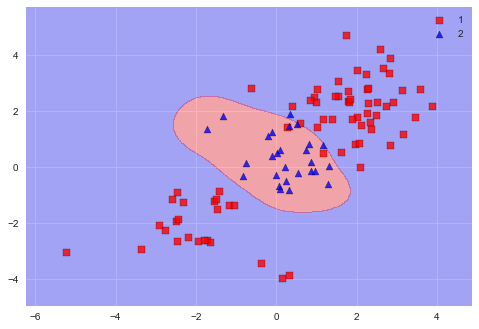

In [17]:
svm = SVC(kernel='rbf', gamma=1, C=1)
svm.fit(X_train, y_train)
#plot_decision_regions(X_train, y_train, clf=svm, X_highlight=svm.support_vectors_);
plot_decision_regions(X_train, y_train, clf=svm);

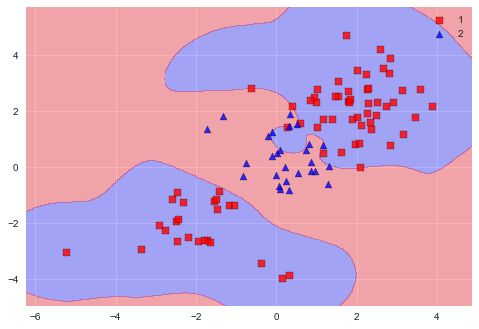

In [18]:
svm2 = SVC(kernel='rbf', gamma=1, C=1e5)
svm2.fit(X_train, y_train)
#plot_decision_regions(X_train, y_train, clf=svm2, X_highlight=svm2.support_vectors_);
plot_decision_regions(X_train, y_train, clf=svm2);

In [19]:
svm3 = SVC(kernel='rbf')
c_space = np.array([0.1, 1, 10, 100, 1000])
g_space = np.array([0.5, 1, 2, 3, 4])
param_grid = {'C': c_space, 'gamma': g_space}

tune = GridSearchCV(svm3, param_grid, cv=10)
tune.fit(X_train, y_train)

tune.cv_results_
tune.best_params_

{'C': 1.0, 'gamma': 0.5}

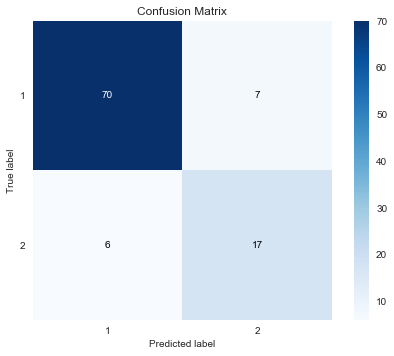

In [20]:
y_pred = tune.predict(X_test)

# let's try another pretty confusion matrix implementation:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred);

# 9.6.3 ROC Curves

In [21]:
svm4 = SVC(kernel='rbf', gamma=2, C=1, probability=True)
svm4.fit(X_train, y_train)

svm5 = SVC(kernel='rbf', gamma=50, C=1, probability=True)
svm5.fit(X_train, y_train)

y_probas4 = svm4.predict_proba(X_train)
y_probas5 = svm5.predict_proba(X_train)

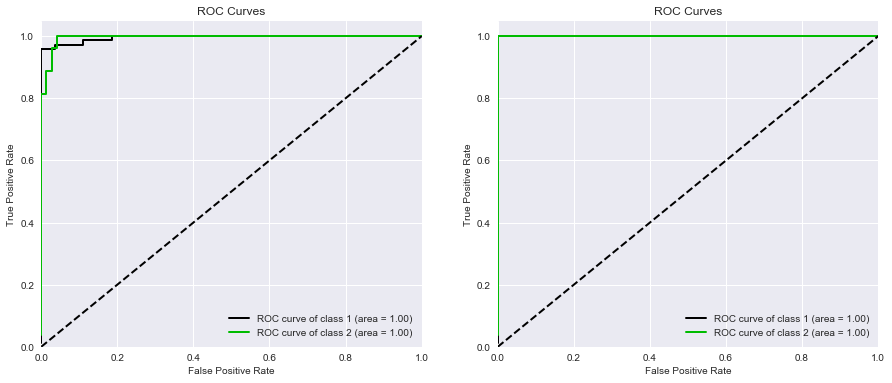

In [22]:
f, axes = plt.subplots(1, 2, sharex=False, sharey=False)
f.set_figheight(6)
f.set_figwidth(15)

skplt.metrics.plot_roc_curve(y_train, y_probas4, curves=['each_class'], ax=axes[0])
skplt.metrics.plot_roc_curve(y_train, y_probas5, curves=['each_class'], ax=axes[1]);

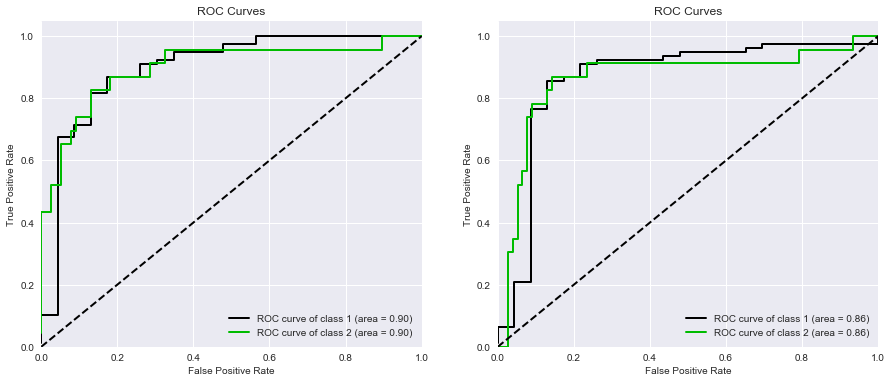

In [23]:
y_probas_test_4 = svm4.predict_proba(X_test)
y_probas_test_5 = svm5.predict_proba(X_test)

f, axes = plt.subplots(1, 2, sharex=False, sharey=False)
f.set_figheight(6)
f.set_figwidth(15)

skplt.metrics.plot_roc_curve(y_test, y_probas_test_4, curves=['each_class'], ax=axes[0])
skplt.metrics.plot_roc_curve(y_test, y_probas_test_5, curves=['each_class'], ax=axes[1]);

# 9.6.4 SVM with Multiple Classes

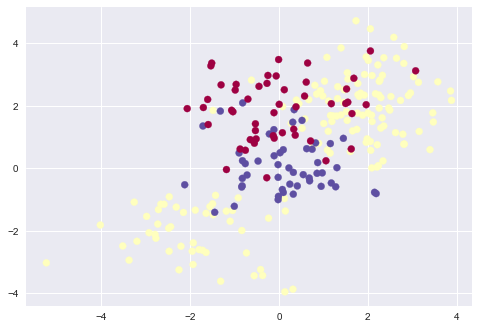

In [24]:
np.random.seed(42)

X = np.random.normal(size=400).reshape(200, 2)
X[0:100, :] += 2
X[100:150, :] -= 2
y = np.concatenate((np.full(150, 1, dtype=np.int64), np.full(50, 2, dtype=np.int64)))

X = np.concatenate((X, np.random.normal(size=100).reshape(50, 2)))
y = np.concatenate((y, np.full(50, 0, dtype=np.int64)))

X[y == 0, 1] += 2

plt.scatter(X[:, 0], X[:, 1], c=y+1, cmap='Spectral');

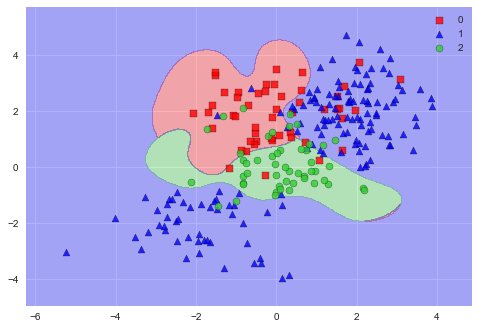

In [25]:
svm_m = SVC(kernel='rbf', C=10, gamma=1)
svm_m.fit(X, y)

#plot_decision_regions(X, y, clf=svm_m, X_highlight=svm_m.support_vectors_);
plot_decision_regions(X, y, clf=svm_m);


# 9.6.5 Application to Gene Expression Data

In [26]:
khan_X_train = pd.read_csv('data/Khan_xtrain.csv', index_col=0)
khan_y_train = pd.read_csv('data/Khan_ytrain.csv', index_col=0)
khan_X_test = pd.read_csv('data/Khan_xtest.csv', index_col=0)
khan_y_test = pd.read_csv('data/Khan_ytest.csv', index_col=0)

In [27]:
khan_X_train.shape, khan_X_test.shape, len(khan_y_train), len(khan_y_test)

((63, 2308), (20, 2308), 63, 20)

In [28]:
khan_y_train.iloc[:, 0].value_counts(sort=False)

1     8
2    23
3    12
4    20
Name: x, dtype: int64

In [29]:
khan_y_test.iloc[:, 0].value_counts(sort=False)

1    3
2    6
3    6
4    5
Name: x, dtype: int64

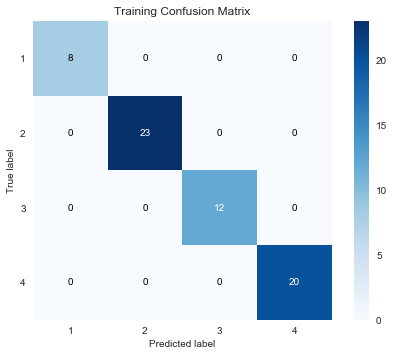

In [30]:
out = SVC(kernel='linear', C=10)
out.fit(khan_X_train, khan_y_train.iloc[:, 0])

khan_y_train_pred = out.predict(khan_X_train)

skplt.metrics.plot_confusion_matrix(khan_y_train, 
                                    khan_y_train_pred, 
                                    title='Training Confusion Matrix');

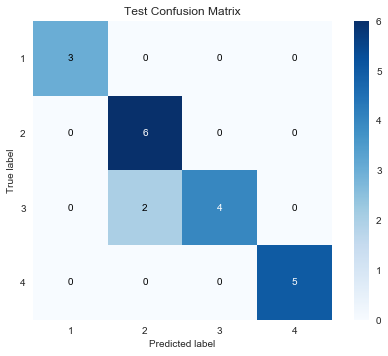

In [31]:
khan_y_test_pred = out.predict(khan_X_test)

skplt.metrics.plot_confusion_matrix(khan_y_test, 
                                    khan_y_test_pred, 
                                    title='Test Confusion Matrix');